This block reads the dataset directory and prints the available classes :-

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

datasetpath = "../dataset"

classes = os.listdir(datasetpath)
print(f"Classes found are :- {classes}")


Classes found are :- ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


This block loops through each class, loads one sample image, and displays it :-

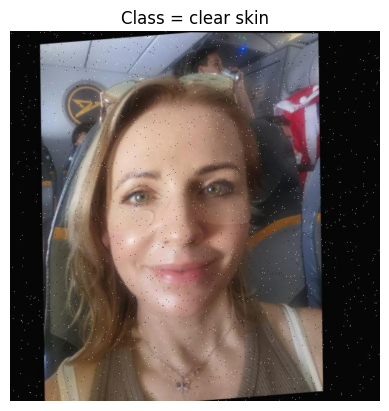

clear_skin_001.jpg from clear skin = (640, 640, 3)



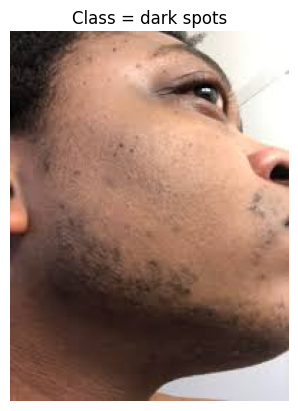

0183c6d6-8b71-4a85-a2c3-fe3fcbca3668.jpg from dark spots = (259, 195, 3)



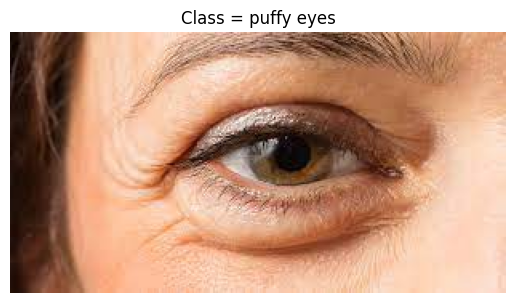

1.jpg from puffy eyes = (163, 310, 3)



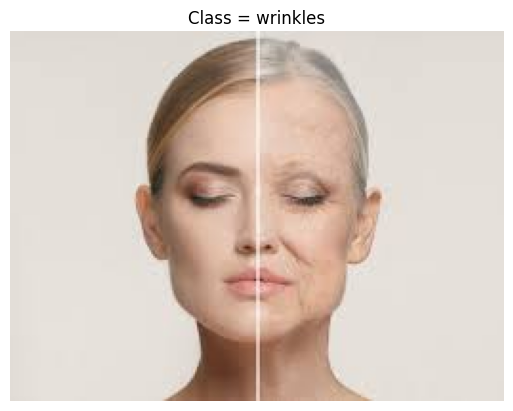

1.jpg from wrinkles = (194, 259, 3)



In [14]:
for c in classes:
    clfolder = os.path.join(datasetpath,c)
    imagename = os.listdir(clfolder)[0]
    imgagepath = os.path.join(clfolder,imagename)

    img = cv2.imread(imgagepath)
    #print(img)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #print(img)

    plt.Figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f"Class = {c}")
    plt.axis("off")
    plt.show()
    print(f"{imagename} from {c} = {img.shape}\n")


This block counts the images in each class and visualizes the distribution using a bar graph:

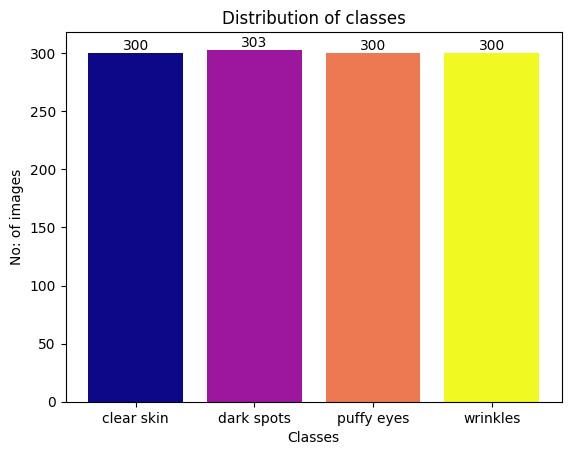

In [15]:
filecount = {}
colors = plt.cm.plasma(np.linspace(0, 1, len(classes)))

for c in classes:
    clfolder = os.path.join(datasetpath,c)
    filecount[c] = len(os.listdir(clfolder))

bargraph = plt.bar(filecount.keys(),filecount.values(),color = colors)
plt.title("Distribution of classes")
plt.xlabel("Classes")
plt.ylabel("No: of images")


for bar in bargraph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,str(height),ha = "center",va = "bottom")

plt.savefig("../images/plotimg.jpg",dpi = 80)
plt.show()

In [1]:
import os
splitset = "../splittedset"
trainpath = os.path.join(splitset, "train")
valpath = os.path.join(splitset, "validation")
testpath = os.path.join(splitset, "test")

This block configures data augmentation and initializes the training and validation generators:

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

splitset = "../splittedset"
trainpath = os.path.join(splitset, "train")
valpath = os.path.join(splitset, "validation")

traingenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,)

trainflow = traingenerator.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

valflow = valgenerator.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)



Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


This block displays sample original validation images and their augmented training counterparts:

Original images: 


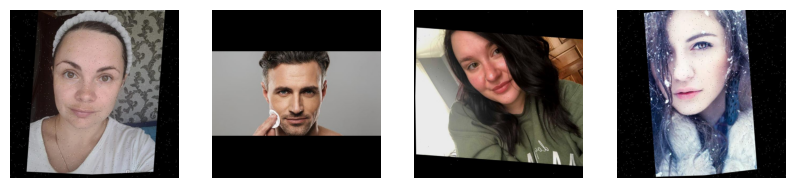

Augmented images: 


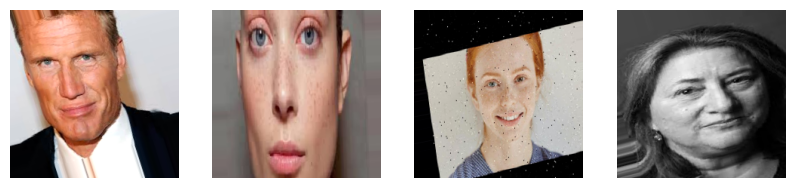

In [18]:
images, labels = next(trainflow)

trainpath = os.path.join("../splittedset", "train")

classname = os.listdir(valpath)[0]
classfolder = os.path.join(trainpath, classname)
filenames = os.listdir(classfolder)[-5:-1]

orgimages = []
for name in filenames:
    imgpath = os.path.join(classfolder, name)
    img = cv2.imread(imgpath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    orgimages.append(img)


print("Original images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(orgimages[i])
    plt.axis("off")
plt.savefig("../images/origimg.jpg",dpi = 80)
plt.show()


print("Augmented images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.savefig("../images/augimg.jpg",dpi = 80)
plt.show()

This block visualizes a single augmented image and prints its one-hot encoded label:

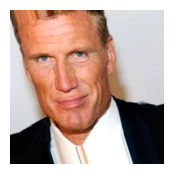

One Hot Encoding of this image :- [0. 0. 0. 1.]


In [19]:

plt.figure(figsize=(2,2))
plt.imshow(images[0])
plt.axis("off")
plt.show()

print(f"One Hot Encoding of this image :- {labels[0]}")

EFFICIENTNETB0

In [20]:
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf, numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
tf.random.set_seed(42)
np.random.seed(42)

In [21]:


traingeneratorb0 = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgeneratorb0 = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

trainflowb0 = traingeneratorb0.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

valflowb0 = valgeneratorb0.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)


Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [22]:

classnumb0 = len(trainflowb0.class_indices)
print("Classes:", trainflowb0.class_indices)

baseb0 = EfficientNetB0(include_top = False, weights = "imagenet", input_shape = (224,224,3))
baseb0.trainable = False

xb0 = baseb0.output
xb0 = layers.GlobalAveragePooling2D()(xb0)
xb0 = layers.BatchNormalization()(xb0)
xb0 = layers.Dropout(0.3)(xb0)
outb0 = layers.Dense(classnumb0, activation = "softmax")(xb0)
modelb0 = models.Model(inputs = baseb0.input, outputs = outb0)

modelb0.compile(
    optimizer = optimizers.Adam(1e-4),
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics = ["accuracy"]
)

print("Starting 1-epoch smoke test...")
history = modelb0.fit(trainflowb0, validation_data=valflowb0, epochs=1)
print("SMOKE TEST FINISHED")

Classes: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}
Starting 1-epoch smoke test...
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 436ms/step - accuracy: 0.3361 - loss: 1.8842 - val_accuracy: 0.3708 - val_loss: 1.3045
SMOKE TEST FINISHED


In [23]:
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight
import os, numpy as np

classesb0 = sorted(trainflowb0.class_indices.keys())
countb0 = []

for c in classesb0:
    countb0.append ( len(os.listdir(os.path.join(trainpath,c))))


labelslistb0 = []

for i,c in enumerate(classesb0):
    labelslistb0 += [i] * countb0[i]


cwb0 = compute_class_weight("balanced", classes= np.unique(labelslistb0), y = np.array(labelslistb0))

classweightsb0 = {}

for i,c in enumerate(cwb0):
    classweightsb0[i] = float(c)



print("class counts:", dict(zip(classesb0, countb0)))
print("class_weight:", classweightsb0)

chckpointb0 = callbacks.ModelCheckpoint("../models/best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max")
earlystopb0 = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
reducerateb0 = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7)

phase1b0 = modelb0.fit(
    trainflowb0,
    validation_data = valflowb0,
    epochs = 15,
    callbacks = [chckpointb0,earlystopb0,reducerateb0],
    class_weight = classweightsb0
)

print("Phase-1 training complete!")

class counts: {'clear skin': 210, 'dark spots': 212, 'puffy eyes': 210, 'wrinkles': 210}
class_weight: {0: 1.0023809523809524, 1: 0.9929245283018868, 2: 1.0023809523809524, 3: 1.0023809523809524}
Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.3833 - loss: 1.7168

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 386ms/step - accuracy: 0.4204 - loss: 1.6341 - val_accuracy: 0.5000 - val_loss: 1.1608 - learning_rate: 1.0000e-04
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5034 - loss: 1.4641

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.5143 - loss: 1.4256 - val_accuracy: 0.6250 - val_loss: 1.0552 - learning_rate: 1.0000e-04
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5778 - loss: 1.2363

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.5653 - loss: 1.2646 - val_accuracy: 0.6917 - val_loss: 0.9870 - learning_rate: 1.0000e-04
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6131 - loss: 1.2084

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.6093 - loss: 1.1939 - val_accuracy: 0.7083 - val_loss: 0.9095 - learning_rate: 1.0000e-04
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6008 - loss: 1.1834

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - accuracy: 0.6223 - loss: 1.1492 - val_accuracy: 0.7375 - val_loss: 0.8891 - learning_rate: 1.0000e-04
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6602 - loss: 1.0727

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.6603 - loss: 1.0771 - val_accuracy: 0.7458 - val_loss: 0.8957 - learning_rate: 1.0000e-04
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.6758 - loss: 1.0495 - val_accuracy: 0.7250 - val_loss: 0.8964 - learning_rate: 1.0000e-04
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.6912 - loss: 1.0113 - val_accuracy: 0.7333 - val_loss: 0.8957 - learning_rate: 1.0000e-04
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7020 - loss: 1.0152

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.7126 - loss: 1.0204 - val_accuracy: 0.7500 - val_loss: 0.8651 - learning_rate: 5.0000e-05
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.6971 - loss: 0.9922 - val_accuracy: 0.7500 - val_loss: 0.8553 - learning_rate: 5.0000e-05
Epoch 11/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7428 - loss: 0.9074

53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 358ms/step - accuracy: 0.7375 - loss: 0.9270 - val_accuracy: 0.7542 - val_loss: 0.8698 - learning_rate: 5.0000e-05
Epoch 12/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 544ms/step - accuracy: 0.7043 - loss: 0.9641 - val_accuracy: 0.7375 - val_loss: 0.8541 - learning_rate: 5.0000e-05
Epoch 13/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 517ms/step - accuracy: 0.7090 - loss: 0.9795 - val_accuracy: 0.7208 - val_loss: 0.8804 - learning_rate: 5.0000e-05
Epoch 14/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 537ms/step - accuracy: 0.7435 - loss: 0.9273 - val_accuracy: 0.7500 - val_loss: 0.8570 - learning_rate: 5.0000e-05
Epoch 15/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 357ms/step - accuracy: 0.7268 - loss: 0.9396 - val_accuracy: 0.7375 - val_loss: 0.8591 - learning_rate: 5.0000e-05
Phase-1 training complete!


In [24]:
bestepoch = np.argmax(phase1b0.history['val_accuracy'])

trainacc = phase1b0.history['accuracy'][bestepoch]
valacc = phase1b0.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 73.75296950340271
Validation Accuracy: 75.41666626930237


In [25]:
from tensorflow.keras import optimizers, callbacks

baseb0.trainable = True

Nb0 = 20

for layer in baseb0.layers[:-Nb0]:
    layer.trainable = False
for layer in baseb0.layers[-Nb0:]:
    layer.trainable = True

for layer in baseb0.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False


print("Trainable layers in base:", sum([1 for l in baseb0.layers if l.trainable]))

modelb0.compile(
    optimizer=optimizers.Adam(1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

chckpointb0 = callbacks.ModelCheckpoint("../models/best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max")
earlystopb0   = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
reducerateb0  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7)
finetuneb0 = modelb0.fit(
    trainflowb0,
    validation_data=valflowb0,
    epochs=30,
    callbacks=[chckpointb0, earlystopb0, reducerateb0],
    class_weight=classweightsb0
)
print("Fine-tuning finished")



Trainable layers in base: 15
Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.7354 - loss: 0.9157

53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 808ms/step - accuracy: 0.7328 - loss: 0.9339 - val_accuracy: 0.7375 - val_loss: 0.8821 - learning_rate: 1.0000e-05
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7353 - loss: 0.9208

53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 645ms/step - accuracy: 0.7363 - loss: 0.9170 - val_accuracy: 0.7625 - val_loss: 0.8183 - learning_rate: 1.0000e-05
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7043 - loss: 0.9593

53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 484ms/step - accuracy: 0.7221 - loss: 0.9242 - val_accuracy: 0.7708 - val_loss: 0.8130 - learning_rate: 1.0000e-05
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.7577 - loss: 0.8836 - val_accuracy: 0.7708 - val_loss: 0.7877 - learning_rate: 1.0000e-05
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.7684 - loss: 0.8712

53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 318ms/step - accuracy: 0.7743 - loss: 0.8614 - val_accuracy: 0.7792 - val_loss: 0.7889 - learning_rate: 1.0000e-05
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7620 - loss: 0.8809

53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step - accuracy: 0.7660 - loss: 0.8777 - val_accuracy: 0.8042 - val_loss: 0.7899 - learning_rate: 1.0000e-05
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.7577 - loss: 0.8691 - val_accuracy: 0.7875 - val_loss: 0.7922 - learning_rate: 1.0000e-05
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.7708 - loss: 0.8492 - val_accuracy: 0.7917 - val_loss: 0.7993 - learning_rate: 5.0000e-06
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.7933 - loss: 0.8219 - val_accuracy: 0.7833 - val_loss: 0.8098 - learning_rate: 5.0000e-06
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.8029 - loss: 0.8082 - val_accuracy: 0.7833 - val_loss: 0.8125 - learning_rate: 5.0000e-06
Fine-tuning finished


In [26]:
import json

with open("../history/efficientnetb0_history.json", "w") as f:
    json.dump(finetuneb0.history, f)

bestepoch = np.argmax(finetuneb0.history['val_accuracy'])

trainacc = finetuneb0.history['accuracy'][bestepoch]
valacc = finetuneb0.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 76.60332322120667
Validation Accuracy: 80.41666746139526


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

testgenb0 = ImageDataGenerator(preprocessing_function=preprocess_input)

testflowb0 = testgenb0.flow_from_directory(
    testpath,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = False
)

lossb0, accb0 = modelb0.evaluate(testflowb0)
print("Test Loss:", lossb0)
print("Test Accuracy:", accb0*(100))

predictionb0 = np.argmax(modelb0.predict(testflowb0), axis = 1)
trueb0 = testflowb0.classes
labelsb0 = list(testflowb0.class_indices.keys())


print("\nClassification Report:")
print(classification_report(trueb0, predictionb0, target_names=labelsb0))


Found 121 images belonging to 4 classes.


2025-12-18 21:15:57.723150: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:15:57.930179: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:15:58.242312: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:15:58.448843: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:15:58.495863: E external/local_xla/xla/service

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8490 - loss: 0.6481

2025-12-18 21:16:06.377345: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2116', 4 bytes spill stores, 4 bytes spill loads

2025-12-18 21:16:13.234915: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:16:13.436540: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:16:13.634994: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:16:14.586312: E external/local_xla/xla/stre

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.7851 - loss: 0.7499 
Test Loss: 0.7498564720153809
Test Accuracy: 78.51239442825317
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step  

Classification Report:
              precision    recall  f1-score   support

  clear skin       0.87      0.87      0.87        30
  dark spots       0.80      0.90      0.85        31
  puffy eyes       0.74      0.57      0.64        30
    wrinkles       0.73      0.80      0.76        30

    accuracy                           0.79       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.78      0.79      0.78       121



In [28]:
import tensorflow as tf
from tensorflow.keras import backend as K
import gc

K.clear_session()
gc.collect()

0

RESNET!

In [2]:
import os, random, numpy as np, tensorflow as tf, math, matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report

2025-12-25 13:13:40.029577: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-25 13:13:40.098078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-25 13:13:41.347817: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [19]:
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [20]:

traingenerator = ImageDataGenerator(
    preprocessing_function = resnet_preprocess,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgenerator = ImageDataGenerator(
    preprocessing_function = resnet_preprocess,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode="nearest"
)

trainflow = traingenerator.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

valflow = valgenerator.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)
classnum = len(trainflow.class_indices)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [21]:
stepsperepoch = math.ceil(trainflow.samples / trainflow.batch_size)
validationsteps = math.ceil(valflow.samples / valflow.batch_size)

In [22]:
def mixup(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    idx = np.random.permutation(batch_size)
    x2 = x[idx]
    y2 = y[idx]
    x_mix = lam * x + (1 - lam) * x2
    y_mix = lam * y + (1 - lam) * y2
    return x_mix, y_mix


def mixupgenerator(iterator, alpha=0.2):
    while True:
        x, y = next(iterator)
        x, y = mixup(x, y, alpha)
        yield x, y


mixedtraingen = mixupgenerator(trainflow, alpha=0.1)

print("MixUp generator ready. Steps/epoch:", stepsperepoch)


MixUp generator ready. Steps/epoch: 53


In [23]:
base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
base.trainable = False

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x) 
out = layers.Dense(
    classnum,
    activation='softmax',
    kernel_regularizer=regularizers.l2(1e-4)
)(x)

model = models.Model(inputs=base.input, outputs=out)


In [24]:
loss = CategoricalCrossentropy()
opt = optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=opt,
    loss=loss,
    metrics=['accuracy']
)

print("Compiled for phase-1 training.")


Compiled for phase-1 training.


In [25]:
checkpointpath = "../models/resnet_best_model.h5"
chkp = callbacks.ModelCheckpoint(checkpointpath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)


In [26]:
historyphase1 = model.fit(
    mixedtraingen,
    steps_per_epoch=stepsperepoch,
    validation_data=valflow,
    validation_steps=validationsteps,
    epochs=15,
    callbacks=[chkp, early, reduce],
    verbose=1
)

print("Phase-1 done")


Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2768 - loss: 2.0253
Epoch 1: val_accuracy improved from None to 0.38333, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 440ms/step - accuracy: 0.3444 - loss: 1.7800 - val_accuracy: 0.3833 - val_loss: 1.3312 - learning_rate: 1.0000e-04
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4794 - loss: 1.3360
Epoch 2: val_accuracy improved from 0.38333 to 0.55833, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.5261 - loss: 1.2521 - val_accuracy: 0.5583 - val_loss: 1.0543 - learning_rate: 1.0000e-04
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.5702 - loss: 1.1512
Epoch 3: val_accuracy improved from 0.55833 to 0.65000, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - accuracy: 0.5962 - loss: 1.0933 - val_accuracy: 0.6500 - val_loss: 0.9190 - learning_rate: 1.0000e-04
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6524 - loss: 0.9881
Epoch 4: val_accuracy improved from 0.65000 to 0.66250, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.6496 - loss: 1.0254 - val_accuracy: 0.6625 - val_loss: 0.8294 - learning_rate: 1.0000e-04
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6606 - loss: 0.8997
Epoch 5: val_accuracy did not improve from 0.66250
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.6865 - loss: 0.8845 - val_accuracy: 0.6583 - val_loss: 0.8159 - learning_rate: 1.0000e-04
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7118 - loss: 0.8707
Epoch 6: val_accuracy did not improve from 0.66250
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.6936 - loss: 0.9055 - val_accuracy: 0.6583 - val_loss: 0.8242 - learning_rate: 1.0000e-04
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7260 - loss: 0.8633
Epoch 7: val_accuracy improved from 0.66250 to 0.72917, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.7257 - loss: 0.8305 - val_accuracy: 0.7292 - val_loss: 0.7110 - learning_rate: 1.0000e-04
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7119 - loss: 0.8183
Epoch 8: val_accuracy did not improve from 0.72917
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.7292 - loss: 0.7607 - val_accuracy: 0.7208 - val_loss: 0.6912 - learning_rate: 1.0000e-04
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7328 - loss: 0.7686
Epoch 9: val_accuracy did not improve from 0.72917
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.7435 - loss: 0.7588 - val_accuracy: 0.6875 - val_loss: 0.6686 - learning_rate: 1.0000e-04
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6961 - loss: 0.8658
Epoch 10: val_accuracy did not improve from 0.72917
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.7209 - loss: 0.7924 - val_accuracy: 0.7292 - val_loss: 0.6832 - learning_rate: 1.0000e-04
Epo

53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.7743 - loss: 0.6850 - val_accuracy: 0.7583 - val_loss: 0.6039 - learning_rate: 1.0000e-04
Epoch 14/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7489 - loss: 0.8251
Epoch 14: val_accuracy improved from 0.75833 to 0.76667, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.7660 - loss: 0.7210 - val_accuracy: 0.7667 - val_loss: 0.6009 - learning_rate: 1.0000e-04
Epoch 15/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8073 - loss: 0.6464
Epoch 15: val_accuracy improved from 0.76667 to 0.79167, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.7993 - loss: 0.6197 - val_accuracy: 0.7917 - val_loss: 0.5868 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 15.
Phase-1 done


In [27]:
bestepoch = np.argmax(historyphase1.history['val_accuracy'])

trainacc = historyphase1.history['accuracy'][bestepoch]
valacc = historyphase1.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)

Train Accuracy (best-val epoch): 79.92874383926392
Validation Accuracy: 79.16666865348816


In [28]:
learning_rates = [1e-4, 5e-5]
lr_results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")

    model = tf.keras.models.load_model(checkpointpath)

    N = 30
    for layer in model.layers[:-N]:
        layer.trainable = False
    for layer in model.layers[-N:]:
        layer.trainable = True

    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss=CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )

    history = model.fit(
        mixedtraingen,
        steps_per_epoch=stepsperepoch,
        validation_data=valflow,
        validation_steps=validationsteps,
        epochs=6,
        verbose=1
    )

    lr_results[lr] = max(history.history["val_accuracy"])
best_lr = max(lr_results, key=lr_results.get)
print("Best LR:", best_lr)


Testing learning rate: 0.0001


Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 440ms/step - accuracy: 0.7767 - loss: 0.9950 - val_accuracy: 0.7333 - val_loss: 0.9706
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.8076 - loss: 0.8349 - val_accuracy: 0.8208 - val_loss: 0.8106
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.8694 - loss: 0.8260 - val_accuracy: 0.8542 - val_loss: 0.7793
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.8789 - loss: 0.7521 - val_accuracy: 0.8375 - val_loss: 0.7040
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9074 - loss: 0.6726 - val_accuracy: 0.8875 - val_loss: 0.7140
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - accuracy: 0.8979 - loss: 0.7177 - val_accuracy: 0.8708 - val_loss: 0.6887

Testing learning rate: 5e-05


Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 373ms/step - accuracy: 0.7815 - loss: 0.8995 - val_accuracy: 0.8042 - val_loss: 0.7957
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.8147 - loss: 0.8326 - val_accuracy: 0.8458 - val_loss: 0.7467
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.8741 - loss: 0.7629 - val_accuracy: 0.8667 - val_loss: 0.7348
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.8658 - loss: 0.7493 - val_accuracy: 0.8458 - val_loss: 0.7894
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9002 - loss: 0.7327 - val_accuracy: 0.8458 - val_loss: 0.7279
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9050 - loss: 0.6780 - val_accuracy: 0.8500 - val_loss: 0.7354
Best LR: 0.0001


In [29]:
N = 40 
for layer in base.layers[:-N]:
    layer.trainable = False
for layer in base.layers[-N:]:
    layer.trainable = True

print("Trainable base layers:",
      sum(1 for l in base.layers if l.trainable))

finetune_loss = CategoricalCrossentropy()

finetune_opt = optimizers.Adam(best_lr)

model.compile(
    optimizer=finetune_opt,
    loss=finetune_loss,
    metrics=['accuracy']
)


history_ft = model.fit(
    mixedtraingen,
    steps_per_epoch=stepsperepoch,
    validation_data=valflow,
    validation_steps=validationsteps,
    epochs=20,
    callbacks=[chkp, early, reduce],
    verbose=1
)

print("Fine-tune done")


Trainable base layers: 40
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9369 - loss: 0.3608
Epoch 1: val_accuracy improved from 0.79167 to 0.86250, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 411ms/step - accuracy: 0.9228 - loss: 0.3612 - val_accuracy: 0.8625 - val_loss: 0.4622 - learning_rate: 1.0000e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9334 - loss: 0.2876
Epoch 2: val_accuracy improved from 0.86250 to 0.87083, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.9311 - loss: 0.3174 - val_accuracy: 0.8708 - val_loss: 0.4540 - learning_rate: 1.0000e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9143 - loss: 0.4184
Epoch 3: val_accuracy improved from 0.87083 to 0.87917, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.9097 - loss: 0.4079 - val_accuracy: 0.8792 - val_loss: 0.3605 - learning_rate: 1.0000e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9132 - loss: 0.4070
Epoch 4: val_accuracy did not improve from 0.87917
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.8990 - loss: 0.4827 - val_accuracy: 0.8125 - val_loss: 0.7392 - learning_rate: 1.0000e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9249 - loss: 0.3677
Epoch 5: val_accuracy improved from 0.87917 to 0.90000, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9323 - loss: 0.3585 - val_accuracy: 0.9000 - val_loss: 0.3540 - learning_rate: 1.0000e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9455 - loss: 0.2973
Epoch 6: val_accuracy did not improve from 0.90000
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9406 - loss: 0.2841 - val_accuracy: 0.8708 - val_loss: 0.3798 - learning_rate: 1.0000e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9521 - loss: 0.3753
Epoch 7: val_accuracy did not improve from 0.90000
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.9347 - loss: 0.4089 - val_accuracy: 0.8708 - val_loss: 0.4197 - learning_rate: 1.0000e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9414 - loss: 0.4103
Epoch 8: val_accuracy did not improve from 0.90000
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.9466 - loss: 0.3642 - val_accuracy: 0.8958 - val_loss: 0.3515 - learning_rate: 1.0000e-04
Epoch 

53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.9620 - loss: 0.2870 - val_accuracy: 0.9167 - val_loss: 0.3041 - learning_rate: 5.0000e-05
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9851 - loss: 0.1789
Epoch 15: val_accuracy did not improve from 0.91667
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.9857 - loss: 0.2093 - val_accuracy: 0.8875 - val_loss: 0.3332 - learning_rate: 5.0000e-05
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.
Fine-tune done


In [30]:
import json

with open("../history/resnet_history.json", "w") as f:
    json.dump(history_ft.history, f)



bestepoch = np.argmax(history_ft.history['val_accuracy'])

trainacc = history_ft.history['accuracy'][bestepoch]
valacc = history_ft.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 96.19952440261841
Validation Accuracy: 91.66666865348816


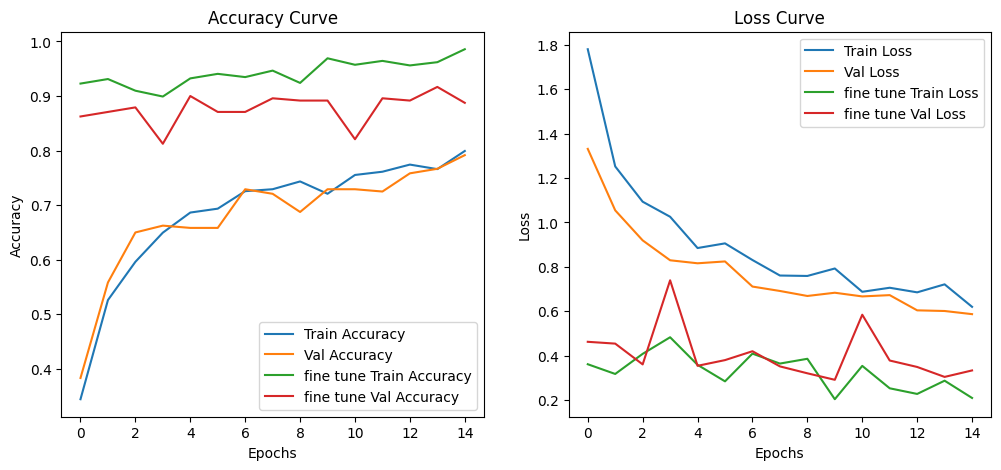

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(historyphase1.history["accuracy"], label="Train Accuracy")
plt.plot(historyphase1.history["val_accuracy"], label="Val Accuracy")
plt.plot(history_ft.history["accuracy"], label="fine tune Train Accuracy")
plt.plot(history_ft.history["val_accuracy"], label="fine tune Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(historyphase1.history["loss"], label="Train Loss")
plt.plot(historyphase1.history["val_loss"], label="Val Loss")
plt.plot(history_ft.history["loss"], label="fine tune Train Loss")
plt.plot(history_ft.history["val_loss"], label="fine tune Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [4]:
testgenerator = ImageDataGenerator(
    preprocessing_function=resnet_preprocess
)

testflow = testgenerator.flow_from_directory(
    testpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)


Found 121 images belonging to 4 classes.


I0000 00:00:1766648667.227870    8771 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-12-25 13:14:33.753092: I external/local_xla/xla/service/service.cc:163] XLA service 0x7cd1e0002950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-25 13:14:33.753138: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-12-25 13:14:33.859287: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-25 13:14:34.570553: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700


2/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9375 - loss: 0.1218

I0000 00:00:1766648678.439931    9483 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 592ms/step - accuracy: 0.8926 - loss: 0.2864
Test loss: 0.2864  Test accuracy: 89.26%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 472ms/step


<Figure size 600x600 with 0 Axes>

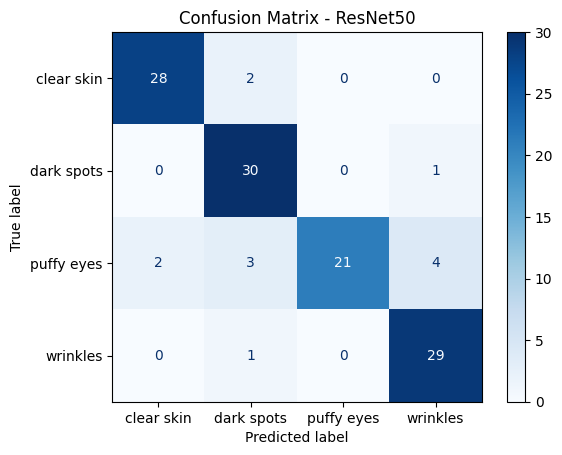


Classification report:

              precision    recall  f1-score   support

  clear skin       0.93      0.93      0.93        30
  dark spots       0.83      0.97      0.90        31
  puffy eyes       1.00      0.70      0.82        30
    wrinkles       0.85      0.97      0.91        30

    accuracy                           0.89       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.90      0.89      0.89       121



In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

testflow.reset()

test_steps = math.ceil(testflow.samples / testflow.batch_size)

best = tf.keras.models.load_model("../models/resnet_best_model.h5")

loss, acc = best.evaluate(
    testflow,
    steps=test_steps,
    verbose=1
)

print(f"Test loss: {loss:.4f}  Test accuracy: {acc*100:.2f}%")

testflow.reset()
pred_probs = best.predict(
    testflow,
    steps=test_steps,
    verbose=1
)

preds = np.argmax(pred_probs, axis=1)
true = testflow.classes[:len(preds)]
labels = list(testflow.class_indices.keys())


cm = confusion_matrix(true, preds)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - ResNet50")
plt.show()

print("\nClassification report:\n")
print(classification_report(true, preds, target_names=labels))


In [18]:
import tensorflow as tf
from tensorflow.keras import backend as K
import gc

K.clear_session()
gc.collect()


0

EFFICIENTNETB2

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt,numpy as np


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 260
batch_size = 16

traingen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

valgen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1
)

trainflow = traingen.flow_from_directory(
    "../splittedset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

valflow = valgen.flow_from_directory(
    "../splittedset/validation",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

testgen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

testflow = testgen.flow_from_directory(
    "../splittedset/test",
    target_size=(260, 260),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [21]:
base_model = EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model.trainable = False


In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(trainflow.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [23]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [24]:
checkpoint = ModelCheckpoint(
    "../models/efficientnetb2_best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)

earlystop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-7
)


In [25]:
history = model.fit(
    trainflow,
    validation_data=valflow,
    epochs=20,
    callbacks=[checkpoint, earlystop, reduce_lr]
)

print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

Epoch 1/20


2025-12-18 21:36:46.484850: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[16,528,17,17]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,528,17,17]{3,2,1,0}, f32[528,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=528, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 21:36:46.596680: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.11291129s
Trying algorithm eng3{k11=2} for conv (f32[16,528,17,17]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,528,17,17]{3,2,1,0}, f32[528,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=528, custom_call_target="__cudnn$

51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2379 - loss: 2.1662

2025-12-18 21:37:26.347200: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:37:26.558738: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:37:27.341627: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:37:27.578288: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:37:27.819645: E external/local_xla/xla/stream_

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.2399 - loss: 2.1581

53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 862ms/step - accuracy: 0.2898 - loss: 1.9489 - val_accuracy: 0.3708 - val_loss: 1.2924 - learning_rate: 1.0000e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.4028 - loss: 1.5353

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.4299 - loss: 1.4722 - val_accuracy: 0.5500 - val_loss: 1.1062 - learning_rate: 1.0000e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.5012 - loss: 1.3287

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.5226 - loss: 1.2834 - val_accuracy: 0.6083 - val_loss: 0.9740 - learning_rate: 1.0000e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5770 - loss: 1.1056

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.5606 - loss: 1.1423 - val_accuracy: 0.6458 - val_loss: 0.8660 - learning_rate: 1.0000e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6250 - loss: 0.9749

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.6271 - loss: 0.9888 - val_accuracy: 0.6750 - val_loss: 0.7865 - learning_rate: 1.0000e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - accuracy: 0.6496 - loss: 0.9325 - val_accuracy: 0.6750 - val_loss: 0.7759 - learning_rate: 1.0000e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6780 - loss: 0.8580

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - accuracy: 0.6675 - loss: 0.9120 - val_accuracy: 0.7292 - val_loss: 0.6941 - learning_rate: 1.0000e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.6841 - loss: 0.7992 - val_accuracy: 0.6917 - val_loss: 0.6881 - learning_rate: 1.0000e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 264ms/step - accuracy: 0.7114 - loss: 0.7651 - val_accuracy: 0.7292 - val_loss: 0.6560 - learning_rate: 1.0000e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6985 - loss: 0.7950

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.7078 - loss: 0.7354 - val_accuracy: 0.7417 - val_loss: 0.6223 - learning_rate: 1.0000e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7079 - loss: 0.7541

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step - accuracy: 0.7304 - loss: 0.7025 - val_accuracy: 0.7458 - val_loss: 0.6139 - learning_rate: 1.0000e-04
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.7334 - loss: 0.7656

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 264ms/step - accuracy: 0.7447 - loss: 0.6762 - val_accuracy: 0.7583 - val_loss: 0.6007 - learning_rate: 1.0000e-04
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - accuracy: 0.7423 - loss: 0.6640 - val_accuracy: 0.7500 - val_loss: 0.5697 - learning_rate: 1.0000e-04
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 357ms/step - accuracy: 0.7494 - loss: 0.6699 - val_accuracy: 0.7458 - val_loss: 0.6228 - learning_rate: 1.0000e-04
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7345 - loss: 0.7002

53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.7506 - loss: 0.6324 - val_accuracy: 0.7792 - val_loss: 0.5639 - learning_rate: 1.0000e-04
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7677 - loss: 0.6351

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.7625 - loss: 0.6441 - val_accuracy: 0.8000 - val_loss: 0.5480 - learning_rate: 1.0000e-04
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.7862 - loss: 0.5789 - val_accuracy: 0.7792 - val_loss: 0.5627 - learning_rate: 1.0000e-04
Epoch 18/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.7708 - loss: 0.5895 - val_accuracy: 0.7750 - val_loss: 0.5268 - learning_rate: 1.0000e-04
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.7815 - loss: 0.5456 - val_accuracy: 0.7792 - val_loss: 0.5606 - learning_rate: 1.0000e-04
Epoch 20/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.7732 - loss: 0.5822 - val_accuracy: 0.7667 - val_loss: 0.5534 - learning_rate: 1.0000e-04
0.7731591463088989
0.7666666507720947


In [26]:
bestepoch = np.argmax(history.history['val_accuracy'])

trainacc = history.history['accuracy'][bestepoch]
valacc = history.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 76.24703049659729
Validation Accuracy: 80.0000011920929


In [27]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fine_history = model.fit(
    trainflow,
    validation_data=valflow,
    epochs=10,
    callbacks=[checkpoint, earlystop, reduce_lr]
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 66s 706ms/step - accuracy: 0.7993 - loss: 0.5871 - val_accuracy: 0.7708 - val_loss: 0.5582 - learning_rate: 5.0000e-05
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8183 - loss: 0.5532

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - accuracy: 0.8230 - loss: 0.5035 - val_accuracy: 0.8125 - val_loss: 0.4593 - learning_rate: 5.0000e-05
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8425 - loss: 0.4160

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.8302 - loss: 0.4317 - val_accuracy: 0.8292 - val_loss: 0.4975 - learning_rate: 5.0000e-05
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.8670 - loss: 0.3520 - val_accuracy: 0.8208 - val_loss: 0.4894 - learning_rate: 5.0000e-05
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.8694 - loss: 0.3621 - val_accuracy: 0.8208 - val_loss: 0.4767 - learning_rate: 5.0000e-05
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.8990 - loss: 0.2768 - val_accuracy: 0.8208 - val_loss: 0.4914 - learning_rate: 1.5000e-05
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 310ms/step - accuracy: 0.8812 - loss: 0.3318 - val_accuracy: 0.8208 - val_loss: 0.4976 - learning_rate: 1.5000e-05
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.8979 - loss: 0.2948 - val_accuracy: 0.8250 - val_loss: 0.4556 - learning_rate: 1.5000e-05
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.883

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.8895 - loss: 0.2916 - val_accuracy: 0.8375 - val_loss: 0.4636 - learning_rate: 1.5000e-05
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8653 - loss: 0.3389

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.8812 - loss: 0.2927 - val_accuracy: 0.8417 - val_loss: 0.4426 - learning_rate: 1.5000e-05


In [28]:
import json

with open("../history/efficientnetb2_history.json", "w") as f:
    json.dump(fine_history.history, f)

bestepoch = np.argmax(fine_history.history['val_accuracy'])

trainacc = fine_history.history['accuracy'][bestepoch]
valacc = fine_history.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 88.12351822853088
Validation Accuracy: 84.16666388511658


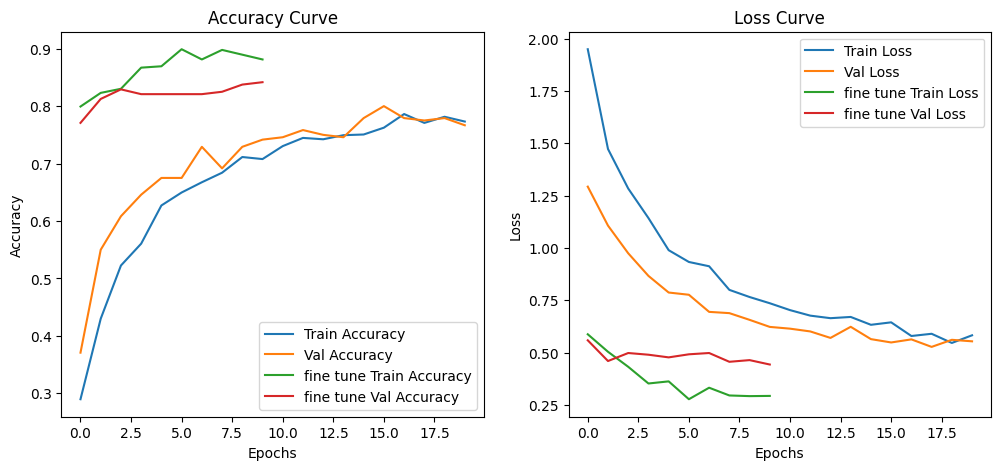

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.plot(fine_history.history["accuracy"], label="fine tune Train Accuracy")
plt.plot(fine_history.history["val_accuracy"], label="fine tune Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(fine_history.history["loss"], label="fine tune Train Loss")
plt.plot(fine_history.history["val_loss"], label="fine tune Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [30]:

test_loss, test_accuracy = model.evaluate(testflow)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9514 - loss: 0.1871

2025-12-18 21:46:17.297873: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:46:17.517453: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:46:17.848515: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 21:46:18.032162: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[9,720,17,17]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,720,17,17]{3,2,1,0}, f32[720,1,5,5]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, featur

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9174 - loss: 0.2446
Test Loss: 0.24457508325576782
Test Accuracy: 0.9173553586006165


In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
import gc

K.clear_session()
gc.collect()

2025-12-18 22:04:18.067125: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 22:04:18.589763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 22:04:20.776968: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


0

MOBILENETV2


In [6]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mn_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np, os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [7]:
img_size = 224
batch_size = 32
epochs_phase1 = 18
epochs_ft = 8

In [8]:
traingen_mn = ImageDataGenerator(
    preprocessing_function=mn_preprocess,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgen_mn = ImageDataGenerator(
    preprocessing_function=mn_preprocess,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1           
)

trainflow_mn = traingen_mn.flow_from_directory(trainpath, target_size=(img_size, img_size),
                                               batch_size=batch_size, class_mode="categorical", shuffle=True)

valflow_mn = valgen_mn.flow_from_directory(valpath, target_size=(img_size, img_size),
                                           batch_size=batch_size, class_mode="categorical", shuffle=False)

testgen_mn = ImageDataGenerator(preprocessing_function=mn_preprocess)
testflow_mn = testgen_mn.flow_from_directory(testpath, target_size=(img_size, img_size),
                                             batch_size=batch_size, class_mode="categorical", shuffle=False)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [9]:
classnum_mn = len(trainflow_mn.class_indices)
base_mn = MobileNetV2(include_top=False, weights="imagenet", input_shape=(img_size, img_size, 3))
base_mn.trainable = False

x = base_mn.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)
out = Dense(classnum_mn, activation="softmax")(x)

model_mn = Model(inputs=base_mn.input, outputs=out)

model_mn.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

I0000 00:00:1766075687.820349   28310 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [10]:
classes_mn = sorted(trainflow_mn.class_indices.keys())
counts_mn = [len(os.listdir(os.path.join(trainpath, c))) for c in classes_mn]
labels_for_weights = []
for i, cnt in enumerate(counts_mn):
    labels_for_weights += [i] * cnt
cw_vals = compute_class_weight("balanced", classes=np.unique(labels_for_weights), y=np.array(labels_for_weights))
class_weights_mn = {i: float(w) for i, w in enumerate(cw_vals)}

print("Class counts:", dict(zip(classes_mn, counts_mn)))
print("Class weights:", class_weights_mn)

Class counts: {'clear skin': 210, 'dark spots': 212, 'puffy eyes': 210, 'wrinkles': 210}
Class weights: {0: 1.0023809523809524, 1: 0.9929245283018868, 2: 1.0023809523809524, 3: 1.0023809523809524}


In [11]:
checkpoint_mn = ModelCheckpoint("../models/mobilenetv2_best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
early_mn = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1)
reduce_mn = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7, verbose=1)

In [12]:
history_phase1_mn = model_mn.fit(
    trainflow_mn,
    validation_data=valflow_mn,
    epochs=epochs_phase1,
    callbacks=[checkpoint_mn, early_mn, reduce_mn],
    class_weight=class_weights_mn,
    verbose=1
)


print("phase1 complete.")


Epoch 1/18


2025-12-18 22:04:53.952127: I external/local_xla/xla/service/service.cc:163] XLA service 0x7824740102a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-18 22:04:53.952161: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-12-18 22:04:54.049856: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 22:04:54.797678: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-18 22:05:03.777737: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:03.986850: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay ker

13/27 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.2128 - loss: 2.3013

2025-12-18 22:05:18.696170: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:19.033477: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:19.380292: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:19.431084: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[10,960,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,960,7,7]{3,2,1,0}, f32[960,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.2200 - loss: 2.2922

2025-12-18 22:05:40.689487: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:40.926421: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 22:05:41.145168: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from None to 0.32083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.2304 - loss: 2.2570 - val_accuracy: 0.3208 - val_loss: 1.4303 - learning_rate: 1.0000e-04
Epoch 2/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.3498 - loss: 1.8124
Epoch 2: val_accuracy improved from 0.32083 to 0.45417, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step - accuracy: 0.3492 - loss: 1.8104 - val_accuracy: 0.4542 - val_loss: 1.2187 - learning_rate: 1.0000e-04
Epoch 3/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.4452 - loss: 1.4686
Epoch 3: val_accuracy improved from 0.45417 to 0.57083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 473ms/step - accuracy: 0.4489 - loss: 1.4531 - val_accuracy: 0.5708 - val_loss: 1.0410 - learning_rate: 1.0000e-04
Epoch 4/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.4822 - loss: 1.3691
Epoch 4: val_accuracy did not improve from 0.57083
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 441ms/step - accuracy: 0.4857 - loss: 1.3491 - val_accuracy: 0.5583 - val_loss: 0.9551 - learning_rate: 1.0000e-04
Epoch 5/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4984 - loss: 1.3293
Epoch 5: val_accuracy improved from 0.57083 to 0.62083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 438ms/step - accuracy: 0.5143 - loss: 1.2923 - val_accuracy: 0.6208 - val_loss: 0.8775 - learning_rate: 1.0000e-04
Epoch 6/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.6114 - loss: 1.0662
Epoch 6: val_accuracy improved from 0.62083 to 0.63750, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 467ms/step - accuracy: 0.5843 - loss: 1.0904 - val_accuracy: 0.6375 - val_loss: 0.8389 - learning_rate: 1.0000e-04
Epoch 7/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6014 - loss: 1.0893
Epoch 7: val_accuracy improved from 0.63750 to 0.67917, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 469ms/step - accuracy: 0.5867 - loss: 1.0806 - val_accuracy: 0.6792 - val_loss: 0.8265 - learning_rate: 1.0000e-04
Epoch 8/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6222 - loss: 0.9438
Epoch 8: val_accuracy did not improve from 0.67917
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 458ms/step - accuracy: 0.6342 - loss: 0.9517 - val_accuracy: 0.6583 - val_loss: 0.7489 - learning_rate: 1.0000e-04
Epoch 9/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.6553 - loss: 0.8798
Epoch 9: val_accuracy did not improve from 0.67917
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 445ms/step - accuracy: 0.6390 - loss: 0.9063 - val_accuracy: 0.6750 - val_loss: 0.7545 - learning_rate: 1.0000e-04
Epoch 10/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6715 - loss: 0.8431
Epoch 10: val_accuracy improved from 0.67917 to 0.68750, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.6615 - loss: 0.8690 - val_accuracy: 0.6875 - val_loss: 0.7268 - learning_rate: 1.0000e-04
Epoch 11/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6664 - loss: 0.8899
Epoch 11: val_accuracy improved from 0.68750 to 0.71667, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 469ms/step - accuracy: 0.6770 - loss: 0.8582 - val_accuracy: 0.7167 - val_loss: 0.7407 - learning_rate: 1.0000e-04
Epoch 12/18
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.6911 - loss: 0.8411
Epoch 12: val_accuracy did not improve from 0.71667
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 429ms/step - accuracy: 0.6758 - loss: 0.8513 - val_accuracy: 0.6833 - val_loss: 0.7247 - learning_rate: 1.0000e-04
Epoch 13/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6711 - loss: 0.8695
Epoch 13: val_accuracy improved from 0.71667 to 0.72917, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 498ms/step - accuracy: 0.6995 - loss: 0.8124 - val_accuracy: 0.7292 - val_loss: 0.6733 - learning_rate: 1.0000e-04
Epoch 14/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.6991 - loss: 0.7840
Epoch 14: val_accuracy did not improve from 0.72917
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - accuracy: 0.7162 - loss: 0.7724 - val_accuracy: 0.7167 - val_loss: 0.6808 - learning_rate: 1.0000e-04
Epoch 15/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.7116 - loss: 0.8016
Epoch 15: val_accuracy did not improve from 0.72917
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 418ms/step - accuracy: 0.7173 - loss: 0.7858 - val_accuracy: 0.7042 - val_loss: 0.6558 - learning_rate: 1.0000e-04
Epoch 16/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7109 - loss: 0.7487
Epoch 16: val_accuracy did not improve from 0.72917
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 454ms/step - accuracy: 0.7458 - loss: 0.6657 - val_accuracy: 0.7250 - val_loss: 0.6554 - learning_rate: 1.0000e-04

27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 510ms/step - accuracy: 0.7126 - loss: 0.7512 - val_accuracy: 0.7542 - val_loss: 0.6074 - learning_rate: 1.0000e-04
Epoch 18/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7041 - loss: 0.7498
Epoch 18: val_accuracy improved from 0.75417 to 0.77083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 449ms/step - accuracy: 0.7102 - loss: 0.7196 - val_accuracy: 0.7708 - val_loss: 0.6111 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 17.
phase1 complete.


In [13]:
bestepoch = np.argmax(history_phase1_mn.history['val_accuracy'])

trainacc = history_phase1_mn.history['accuracy'][bestepoch]
valacc = history_phase1_mn.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 71.02137804031372
Validation Accuracy: 77.08333134651184


In [14]:
N_unfreeze = 50
for layer in base_mn.layers[:-N_unfreeze]:
    layer.trainable = False
for layer in base_mn.layers[-N_unfreeze:]:
    layer.trainable = True

print("Trainable base layers:", sum([1 for l in base_mn.layers if l.trainable]))

model_mn.compile(optimizer=Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history_ft_mn = model_mn.fit(
    trainflow_mn,
    validation_data=valflow_mn,
    epochs=epochs_ft,
    callbacks=[checkpoint_mn, early_mn, reduce_mn],
    class_weight=class_weights_mn,
    verbose=1
)

print("fine tuning complete")

Trainable base layers: 50
Epoch 1/8


2025-12-18 22:09:27.389108: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[32,576,15,15]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,576,17,17]{3,2,1,0}, f32[576,1,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, feature_group_count=576, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 22:09:27.420873: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.033047564s
Trying algorithm eng3{k11=2} for conv (f32[32,576,15,15]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,576,17,17]{3,2,1,0}, f32[576,1,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, feature_group_count=576, custom_call_target="__cudnn$convForward", backend_c

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.6023 - loss: 1.0833
Epoch 1: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 964ms/step - accuracy: 0.6152 - loss: 1.0150 - val_accuracy: 0.7542 - val_loss: 0.5802 - learning_rate: 1.0000e-05
Epoch 2/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.6706 - loss: 0.8663
Epoch 2: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.6710 - loss: 0.8398 - val_accuracy: 0.7375 - val_loss: 0.6097 - learning_rate: 1.0000e-05
Epoch 3/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.7541 - loss: 0.7257
Epoch 3: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - accuracy: 0.7411 - loss: 0.7257 - val_accuracy: 0.7667 - val_loss: 0.5533 - learning_rate: 1.0000e-05
Epoch 4/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.7542 - loss: 0.6274
Epoch 4: val_accuracy improved from 0.77083 to 0.77500, saving model to ../mode

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step - accuracy: 0.7542 - loss: 0.6349 - val_accuracy: 0.7750 - val_loss: 0.5871 - learning_rate: 1.0000e-05
Epoch 5/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7739 - loss: 0.5973
Epoch 5: val_accuracy did not improve from 0.77500
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 393ms/step - accuracy: 0.7613 - loss: 0.6342 - val_accuracy: 0.7667 - val_loss: 0.5685 - learning_rate: 1.0000e-05
Epoch 6/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7893 - loss: 0.5833
Epoch 6: val_accuracy did not improve from 0.77500

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 0.7886 - loss: 0.5922 - val_accuracy: 0.7583 - val_loss: 0.5844 - learning_rate: 1.0000e-05
Epoch 7/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7803 - loss: 0.6090
Epoch 7: val_accuracy did not improve from 0.77500
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 0.8040 - loss: 0.5556 -

In [15]:
import json

with open("../history/mobilenetv2_history.json", "w") as f:
    json.dump(history_ft_mn.history, f)


bestepoch = np.argmax(history_ft_mn.history['val_accuracy'])

trainacc = history_ft_mn.history['accuracy'][bestepoch]
valacc = history_ft_mn.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 75.4156768321991
Validation Accuracy: 77.49999761581421


In [16]:
loss_mn, acc_mn = model_mn.evaluate(testflow_mn, verbose=1)
print(f"Test Loss: {loss_mn:.4f}, Test Acc: {acc_mn*100:.2f}%")

testflow_mn.reset()
preds_mn = np.argmax(model_mn.predict(testflow_mn, verbose=1), axis=1)
true_mn = testflow_mn.classes[:len(preds_mn)]
labels_mn = list(testflow_mn.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_mn, preds_mn, target_names=labels_mn))


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8854 - loss: 0.2450

2025-12-18 22:11:22.366729: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1220', 4 bytes spill stores, 4 bytes spill loads

2025-12-18 22:11:29.910399: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[25,576,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,576,14,14]{3,2,1,0}, f32[576,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=576, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 22:11:30.256288: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.352254379s
Trying algorithm

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.7851 - loss: 0.4813 
Test Loss: 0.4813, Test Acc: 78.51%
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 953ms/step

Classification Report:
              precision    recall  f1-score   support

  clear skin       0.94      0.97      0.95        30
  dark spots       0.70      0.84      0.76        31
  puffy eyes       0.81      0.70      0.75        30
    wrinkles       0.70      0.63      0.67        30

    accuracy                           0.79       121
   macro avg       0.79      0.78      0.78       121
weighted avg       0.79      0.79      0.78       121



In [17]:
import tensorflow as tf
from tensorflow.keras import backend as K
import gc

K.clear_session()
gc.collect()

0

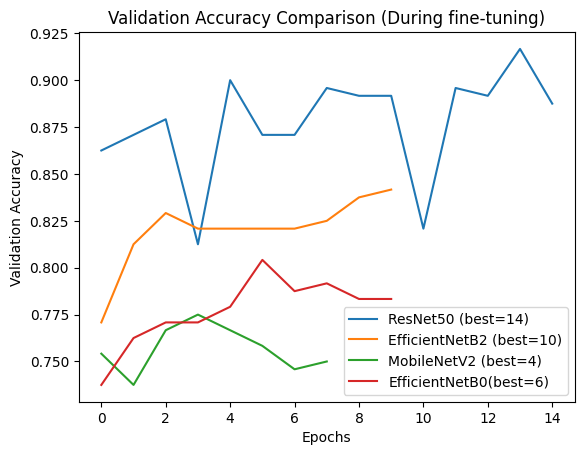

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_history(path):
    with open(path, "r") as f:
        return json.load(f)

resnet = load_history("../history/resnet_history.json")
effb2  = load_history("../history/efficientnetb2_history.json")
mnet   = load_history("../history/mobilenetv2_history.json")
effb0     = load_history("../history/efficientnetb0_history.json")

def best_epoch(h):
    return np.argmax(h['val_accuracy']) + 1


plt.figure()
plt.plot(resnet['val_accuracy'], label=f"ResNet50 (best={best_epoch(resnet)})")
plt.plot(effb2['val_accuracy'], label=f"EfficientNetB2 (best={best_epoch(effb2)})")
plt.plot(mnet['val_accuracy'], label=f"MobileNetV2 (best={best_epoch(mnet)})")
plt.plot(effb0['val_accuracy'], label=f"EfficientNetB0(best={best_epoch(effb0)})")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison (During fine-tuning)")
plt.legend()
plt.show()


In [4]:
import pandas as pd

def row(name, h):
    b = np.argmax(h['val_accuracy'])
    return {
        "Model": name,
        "Total Epochs": len(h['accuracy']), 
        "Best Epoch": b + 1,
        "Train Acc": h['accuracy'][b]*100,
        "Val Acc": h['val_accuracy'][b]*100,
        "Val Loss": h['val_loss'][b]
    }

df = pd.DataFrame([
    row("ResNet50", resnet),
    row("EfficientNetB2", effb2),
    row("MobileNetV2", mnet),
    row("EfficientNetB0", effb0)
])

df


,Model,Total Epochs,Best Epoch,Train Acc,Val Acc,Val Loss
0,ResNet50,15,14,96.199524,91.666669,0.304088
1,EfficientNetB2,10,10,88.123518,84.166664,0.442586
2,MobileNetV2,8,4,75.415677,77.499998,0.587149
3,EfficientNetB0,10,6,76.603323,80.416667,0.789934
